In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [46]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# - Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, 
#Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [6]:
# To  find missing values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [51]:
# No Null values found

In [8]:
# Check data type
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
dfcorr=df.corr()

In [10]:
dfcorr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


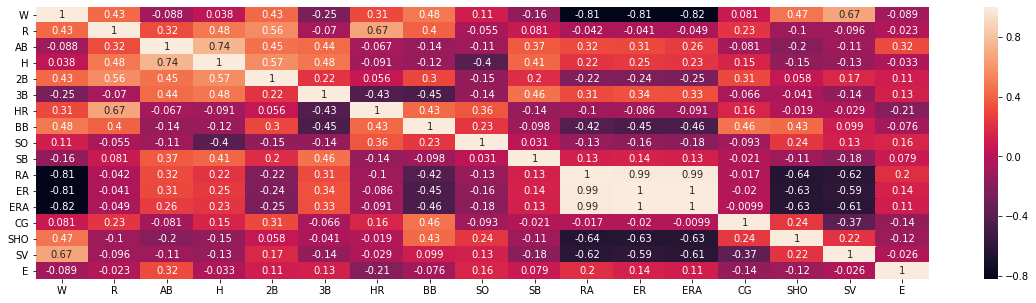

In [13]:
plt.figure(figsize=(20,5))
sns.heatmap(dfcorr,annot=True)

In [14]:
# features in light colors are more correlated with win like SV(saves),R(Runs)

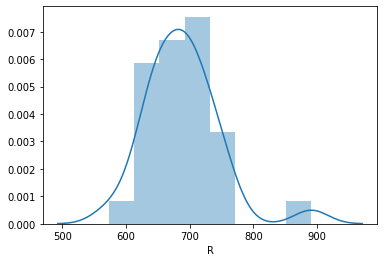

In [15]:
# Univariate analysis
sns.distplot(df['R'])

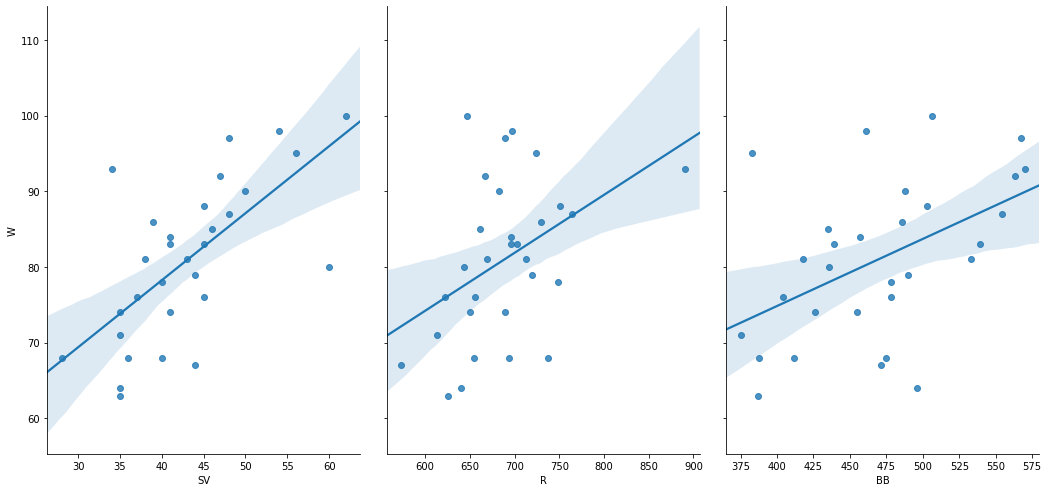

In [16]:
sns.pairplot(df, x_vars=['SV', 'R', 'BB'], y_vars='W', size=7, aspect=0.7, kind='reg')

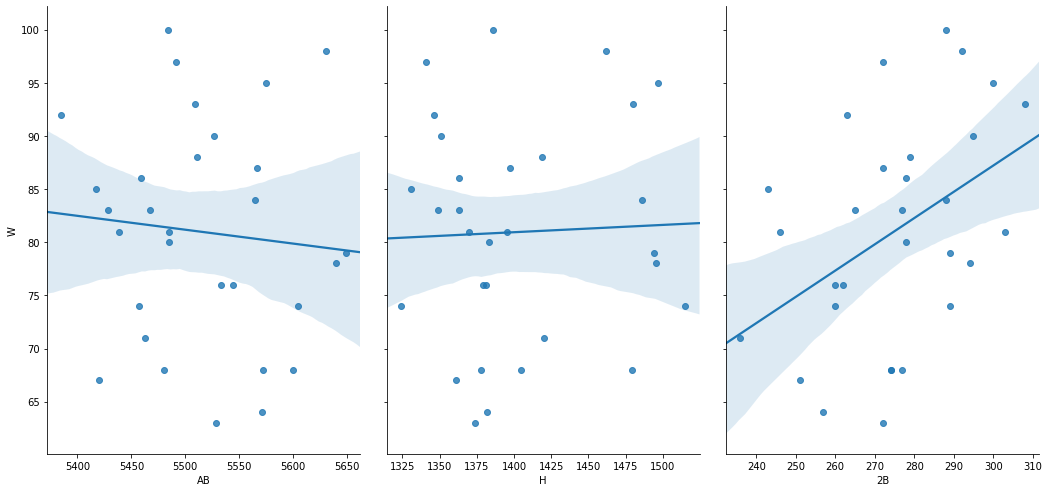

In [17]:
sns.pairplot(df, x_vars=['AB', 'H', '2B'], y_vars='W', size=7, aspect=0.7, kind='reg')

In [18]:
# Saves,Runs and walks has strong impct on win

In [19]:
# Also there are outliers which needs to be treated

In [47]:
# we can drop highly negatively correlated columns i.e RA,ER,ERA
df=df.drop(['RA','ER','ERA'],axis=1)

In [48]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CG', 'SHO',
       'SV', 'E'],
      dtype='object')

In [49]:
# Using z score method to remove outlier
z=np.abs(zscore(df))
df1=df[(z<3).all(axis=1)]

In [50]:
df.shape,df1.shape

((30, 14), (29, 14))

In [52]:
# Checcking skewness of data
skw=df1.skew()
skw

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [53]:
# We will separate target and rest columns
df_x=df1.drop(columns='W')
y=df1['W']

In [54]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [55]:
x.shape,y.shape

((29, 13), (29,))

In [56]:
# Finding best r_state
def maxr2_score(lr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        print('r2 score corresponding to random state',r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to ', final_r_state," is ",max_r_score)
    return final_r_state

In [75]:
# Lets use LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

r2 score corresponding to random state 42  is  0.7325869882954235
r2 score corresponding to random state 43  is  -0.785132393400384
r2 score corresponding to random state 44  is  0.5057513977245244
r2 score corresponding to random state 45  is  0.21446409391842625
r2 score corresponding to random state 46  is  0.684136796367924
r2 score corresponding to random state 47  is  0.6620046532565411
r2 score corresponding to random state 48  is  -0.3520769165122606
r2 score corresponding to random state 49  is  -0.4917060243229776
r2 score corresponding to random state 50  is  0.7265531287571588
r2 score corresponding to random state 51  is  0.33495583862381506
r2 score corresponding to random state 52  is  -0.021542902152086763
r2 score corresponding to random state 53  is  0.3130006661999093
r2 score corresponding to random state 54  is  -0.18284655131956162
r2 score corresponding to random state 55  is  -0.3148417224381099
r2 score corresponding to random state 56  is  0.18047836223353808


In [76]:
# using Lasso
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [77]:
# Lts check max r2 score 
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to random state 42  is  0.731473422116274
r2 score corresponding to random state 43  is  -0.7808035361229653
r2 score corresponding to random state 44  is  0.505465206747816
r2 score corresponding to random state 45  is  0.2133861450694975
r2 score corresponding to random state 46  is  0.684886134826304
r2 score corresponding to random state 47  is  0.6632587564272059
r2 score corresponding to random state 48  is  -0.3483606761243214
r2 score corresponding to random state 49  is  -0.4965594901316024
r2 score corresponding to random state 50  is  0.7267898040129914
r2 score corresponding to random state 51  is  0.3342797918372884
r2 score corresponding to random state 52  is  -0.022170224584529663
r2 score corresponding to random state 53  is  0.3212016046921211
r2 score corresponding to random state 54  is  -0.18123970182051607
r2 score corresponding to random state 55  is  -0.30759674217506383
r2 score corresponding to random state 56  is  0.17863301996759162
r2

In [62]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [63]:
gbr=GradientBoostingRegressor(learning_rate=0.001,n_estimators=500)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to random state 42  is  0.2733337231514107
r2 score corresponding to random state 43  is  -0.14189088877684175
r2 score corresponding to random state 44  is  0.3880253552989301
r2 score corresponding to random state 45  is  0.136508401126875
r2 score corresponding to random state 46  is  0.3671743315910049
r2 score corresponding to random state 47  is  0.3399796102514129
r2 score corresponding to random state 48  is  0.4139769973152214
r2 score corresponding to random state 49  is  -1.2338166751705724
r2 score corresponding to random state 50  is  -0.32916246601415833
r2 score corresponding to random state 51  is  0.30071537951846794
r2 score corresponding to random state 52  is  0.044584376764729816
r2 score corresponding to random state 53  is  0.14750687208306779
r2 score corresponding to random state 54  is  -0.05676230671574212
r2 score corresponding to random state 55  is  0.26779581160517585
r2 score corresponding to random state 56  is  -0.172835839980906

In [66]:
# Use adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[lr,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)

clf.best_params_

{'base_estimator': Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 1,
 'n_estimators': 100}

In [67]:
# Decision Tree
Dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=Dt,learning_rate=1,n_estimators=100)
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to random state 42  is  0.2802768166089965
r2 score corresponding to random state 43  is  -0.7320940404592671
r2 score corresponding to random state 44  is  0.33333333333333337
r2 score corresponding to random state 45  is  -0.1859205776173285
r2 score corresponding to random state 46  is  0.5230698949291914
r2 score corresponding to random state 47  is  0.39392605633802824
r2 score corresponding to random state 48  is  0.6635514018691588
r2 score corresponding to random state 49  is  -1.228755826461097
r2 score corresponding to random state 50  is  0.3024475524475525
r2 score corresponding to random state 51  is  0.2100502512562814
r2 score corresponding to random state 52  is  -0.04363419007770486
r2 score corresponding to random state 53  is  0.568602825745683
r2 score corresponding to random state 54  is  0.4608540925266904
r2 score corresponding to random state 55  is  0.48499810102544627
r2 score corresponding to random state 56  is  -0.3276709879302637
r2 

In [69]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,25)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 5}

In [70]:
# Lets use KNN regression model
knr=KNeighborsRegressor(n_neighbors=4)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to random state 42  is  0.629757785467128
r2 score corresponding to random state 43  is  0.44498359759431394
r2 score corresponding to random state 44  is  0.6204166666666666
r2 score corresponding to random state 45  is  0.21564756317689526
r2 score corresponding to random state 46  is  0.17736409319323887
r2 score corresponding to random state 47  is  0.5702849911971831
r2 score corresponding to random state 48  is  -0.09671228304405877
r2 score corresponding to random state 49  is  -1.9779490856937967
r2 score corresponding to random state 50  is  0.22180944055944063
r2 score corresponding to random state 51  is  0.35113065326633164
r2 score corresponding to random state 52  is  0.13882247459653307
r2 score corresponding to random state 53  is  0.43343799058084775
r2 score corresponding to random state 54  is  0.37444395017793597
r2 score corresponding to random state 55  is  0.0030383592859855035
r2 score corresponding to random state 56  is  0.29375279392042

In [71]:
# LASSO is the best model

In [81]:
# lets check cross val score
from sklearn.model_selection import cross_val_score
print("Mean r2 score",cross_val_score(lsreg,x,y,cv=4,scoring="r2").mean())
print("Mean r2 score",cross_val_score(lr,x,y,cv=4,scoring="r2").mean())

Mean r2 score 0.0005119693682092696
Mean r2 score -0.0012319240343066917


In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=97)

In [88]:
pred=lsreg.predict(x_test)

In [89]:
pred

array([82.40169218, 81.26848792, 91.29852958, 98.47762748, 63.34451462,
       79.43439971])

In [90]:
print("r2 score",r2_score(y_test,pred))

r2 score 0.9824797566949592


In [91]:
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,pred)))

RMSE is :  1.418245841207971


In [92]:
from sklearn.externals import joblib

In [93]:
joblib.dump(lsreg,"sales_predict.pkl")

['sales_predict.pkl']

In [94]:
a=[pred,y_test]

In [95]:
a

[array([82.40169218, 81.26848792, 91.29852958, 98.47762748, 63.34451462,
        79.43439971]), 12    85
 2     81
 25    92
 17    97
 24    63
 7     81
 Name: W, dtype: int64]